# Project 1: Tmdb_Movie_Project 
### Analysis carried out by Titilope Onabajo

## Table of Contents
<ul>
<li><a href="#intro">Table of Contents</a></li>
<li><a href="#intro">Introduction</a></li>
<li><a href="#intro">Research Questions</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **This project was based on a movie dataset called Tmdb-Movies.
> The initial dataset had over 10,800 rows and 21 columns.
> Major libraries used for data cleaning, analysis and visualizations include pandas, numpy and matplotlib.
> 10 research questions were developed to help give a direction towards our analysis.
> The aim of this research questions and analysis was to shows insights about the movie industry over the years and help serve as guidance for key decision making decisions for existing players in the movie market and prospective investors seeking to invest in the movie industry.
> The data analysis process evolved around identifying errors in our data, correcting wrong data types, dropping unwanted columns and duplicate rows, analyzing, visualizing and communicating results of the analysis.
> Key findings of this analysis are embeded in the body of this work, which seeks to give answers to the research questions earlier developed at the beginning of the project.**

# Research Questions

1. Which movies earned the highest revenue, top 20?
2. What has been the trend of movies released over the years?
3. Which has been the revenue trend over the years?
4. Who are the Top 20 Casts with the most movie appearances?
5. Genres; number and proportion of movies released over the years?
6. What director had the most votings; Top 10?
7. Most profitable movies produced; Top 15?
8. What is the correlation between movie runtime and vote ratings?
9. What is the impact of popularity on revenue?
10.What is the impact of inflation on revenue over the years?


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('tmdb_movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

In [4]:
# explore data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
# explore data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Data Cleaning 

In [7]:
df.duplicated().sum()

1

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
sum(df.duplicated())

0

In [10]:
df.drop(['homepage', 'imdb_id', 'tagline', 'overview'], axis=1,inplace=True)

In [11]:
df.shape

(10865, 17)

In [12]:
df.dropna(inplace=True)

In [13]:
#for better analysis, there is need to convert data type of date from string to datetime format

df['release_date']= pd.to_datetime(df['release_date'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8666 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    8666 non-null   int64         
 1   popularity            8666 non-null   float64       
 2   budget                8666 non-null   int64         
 3   revenue               8666 non-null   int64         
 4   original_title        8666 non-null   object        
 5   cast                  8666 non-null   object        
 6   director              8666 non-null   object        
 7   keywords              8666 non-null   object        
 8   runtime               8666 non-null   int64         
 9   genres                8666 non-null   object        
 10  production_companies  8666 non-null   object        
 11  release_date          8666 non-null   datetime64[ns]
 12  vote_count            8666 non-null   int64         
 13  vote_average     

In [15]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Which movie has the highest revenue

In [16]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


top_movies_by_revenue = df.sort_values(by = ['revenue'],ascending = False)[['original_title','revenue']].head(20)
top_movies_by_revenue.reset_index(drop=True,inplace=True)
top_movies_by_revenue.set_index('original_title',inplace=True)
top_movies_by_revenue


,revenue
original_title,
Avatar,2781505847
Star Wars: The Force Awakens,2068178225
Titanic,1845034188
The Avengers,1519557910
Jurassic World,1513528810
Furious 7,1506249360
Avengers: Age of Ultron,1405035767
Harry Potter and the Deathly Hallows: Part 2,1327817822
Frozen,1274219009


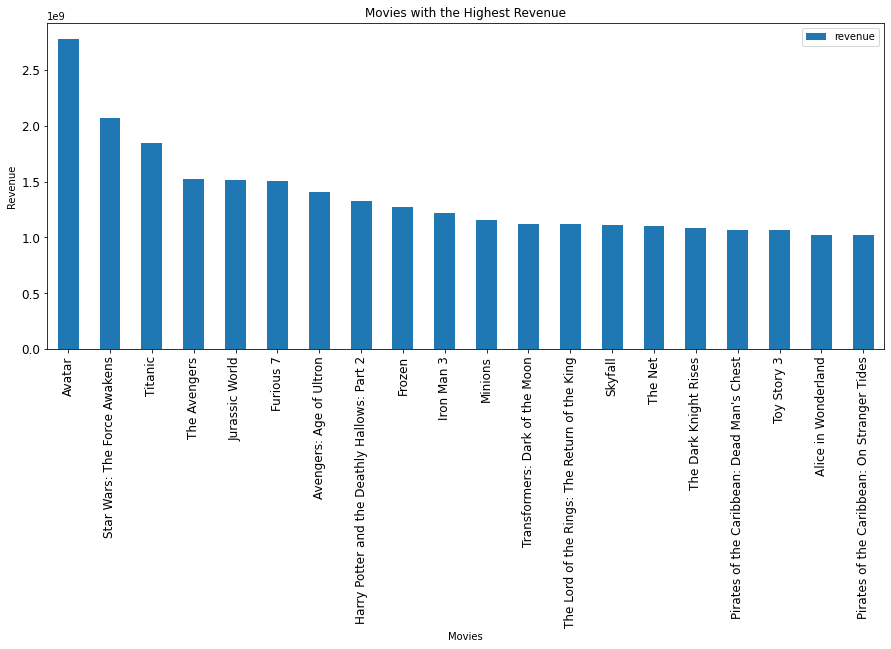

In [17]:
#plot a 'bar' plot using plot function for 'Movies with the Highest Revenue'.
top_movies_by_revenue.iloc[:20].plot.bar(figsize=(15,6),fontsize=12)


#specify the title and the labels of the plot.
plt.title('Movies with the Highest Revenue')
plt.xlabel('Movies')
plt.ylabel('Revenue');

#### key Findings :  Over the years, the top 3 movies in terms of revenue earned are  Avatar, Star wars and Titanic

<a id='eda'></a>

### Research Question 2:  Trend of movies released over the years

In [18]:
#To derive the number of movies for each year in the dataset.

Yearly_release=df.groupby('release_year').count()['id']

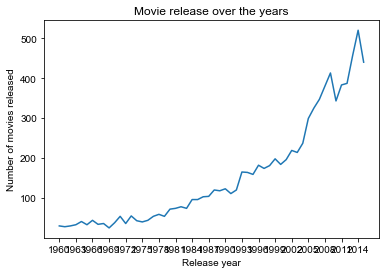

In [19]:
#plot a line chart using plot function for 'Movie release over the years'.
#Year period was set to a 3 year batch period intervals

Yearly_release.plot(xticks = np.arange(1960,2016,3))
sns.set(rc={'figure.figsize':(17,5)})

#specify the title and the labels of the plot, also adjusting the fontsize.
plt.title("Movie release over the years",fontsize = 12)
plt.xlabel('Release year',fontsize = 10)
plt.ylabel('Number of movies released',fontsize = 10)
sns.set_style("ticks")

#### Key Findings : Trend of movies over the years shows that there has been an upward trend in movies released between 1960 and 2015, 2014 being the year with the highest record of movies so far.

<a id='eda'></a>

### Research Question 3: What has been the revenue trend over the years?

In [20]:
#Calculates the total revenue made for each year in the dataset

Revenue_trend = df.groupby("release_year")["revenue"].sum()

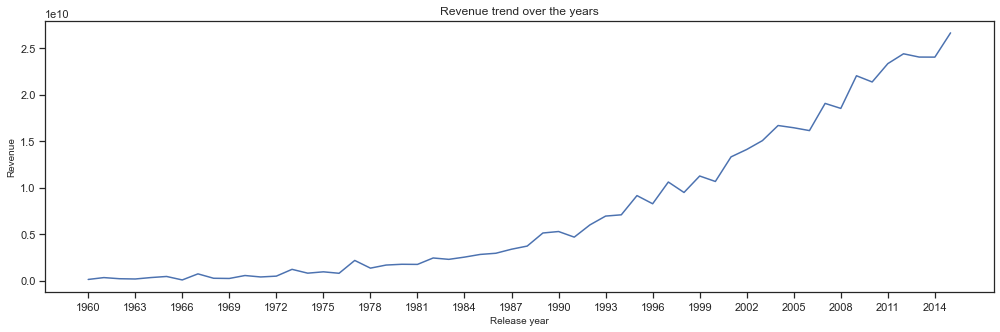

In [21]:
#plot a line chart using plot function for 'Movie release over the years'.
#Year period was set to a 3 year batch period intervals

Revenue_trend.plot(xticks = np.arange(1960,2016,3))
sns.set(rc={'figure.figsize':(12,5)})

plt.title("Revenue trend over the years",fontsize = 12)
plt.xlabel('Release year',fontsize = 10)
plt.ylabel('Revenue',fontsize = 10)
sns.set_style("dark")

#### Key Findings: Revene trend between 1960 and 2015 also shows an upward movement with a  positive steep increased witnessed in 1990

<a id='eda'></a>

### Research Question 4:  Casts with the most movie appearances

In [22]:
def df_split(x):
    #concatenate all the rows of the cast.
    df_split_plot = df[x].str.cat(sep = '|')
    df_split = pd.Series(df_split_plot.split('|'))
    
    #returns the count of each of the cast.
    data = df_split.value_counts(ascending=False)
    return data

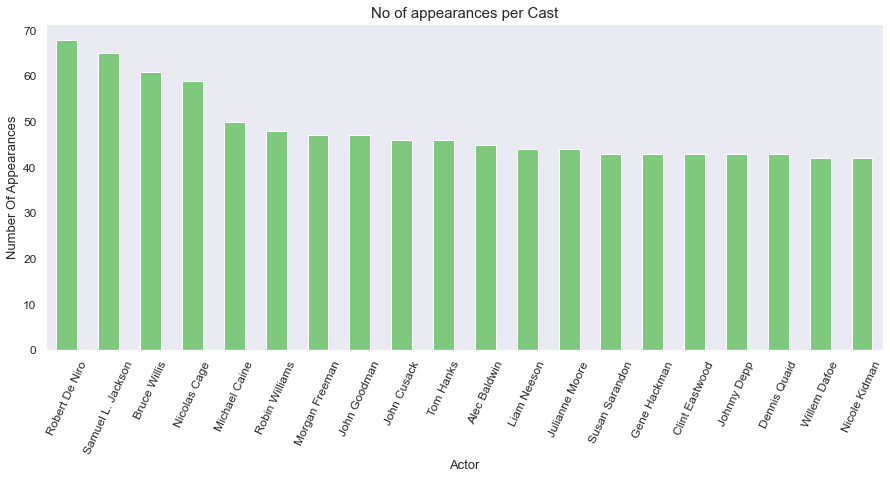

In [23]:
# Make used of df_split to call up the data, and then count number of appearances of each cast.
No_of_appearances = df_split('cast')

#plot a 'bar' plot using the plot funtion, colormap to change the color of the columns from default to preferred color.
No_of_appearances.iloc[:20].plot.bar(figsize=(15,6),colormap= 'Accent',fontsize=12)

#specify the title and the labels of the plot, also adjusting the fontsize.
plt.title("No of appearances per Cast",fontsize=15)
plt.xticks(rotation = 65)
plt.xlabel('Actor',fontsize=13)
plt.ylabel("Number Of Appearances",fontsize= 13)
sns.set_style("dark")

#### Key Findings: Robert De Niro, Samuel L. Jackson and Bruce Willis have been the cast with most appearances in movies.

<a id='eda'></a>

## Research Question 5 (Which Genre Has The Highest Release Of Movies?)

In [24]:
# Make used of df_split to call up the data, and then return the count of each genre in the dataset.
#print function to return the result.

total_genre_movies = df_split('genres')
print(total_genre_movies)

Drama              3934
Comedy             3050
Thriller           2462
Action             2022
Romance            1415
Horror             1339
Adventure          1271
Crime              1200
Science Fiction    1028
Family              946
Fantasy             763
Mystery             703
Animation           512
Music               309
History             287
Documentary         270
War                 235
Western             154
TV Movie            115
Foreign              90
dtype: int64


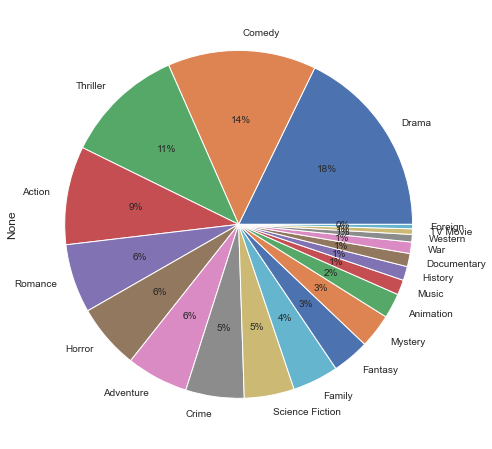

In [25]:
#plot a 'pie chart' using plot function for 'Genre with Highest release of movies'
#figsize to set the size of the pie chart as desired
#fontsize to set the size of each legend datalabel
#autopct to add the percentage of each genre as a percentage of total value

total_genre_movies.plot(kind= 'pie',figsize = (13,8),fontsize=10, autopct='%1.0f%%');

#### Key Findings: Drama, Comedy and Thriller are the genres with highest record of movies released over the years, contributing 18%, 14% and 11% to the total movie released respectively.

### Research Question 6:  What director had the most votings?

In [26]:
# Who are the 10 most rated directors?
# sort_values is used to sort vote_counts
# ascending = False, to reverse the order of arrangement from default ordering
# .head to derive the first 10 on the list

Most_rated_director = df.sort_values(by = ['vote_count'],ascending = False)[['director','vote_count']].head(10)

#change the index from default and replace it director's names
Most_rated_director.reset_index(drop=True,inplace=True)
Most_rated_director.set_index('director',inplace=True)
Most_rated_director

,vote_count
director,
Christopher Nolan,9767
Joss Whedon,8903
James Cameron,8458
Christopher Nolan,8432
Quentin Tarantino,7375
Gary Ross,7080
Shane Black,6882
Christopher Nolan,6723
Christopher Nolan,6498


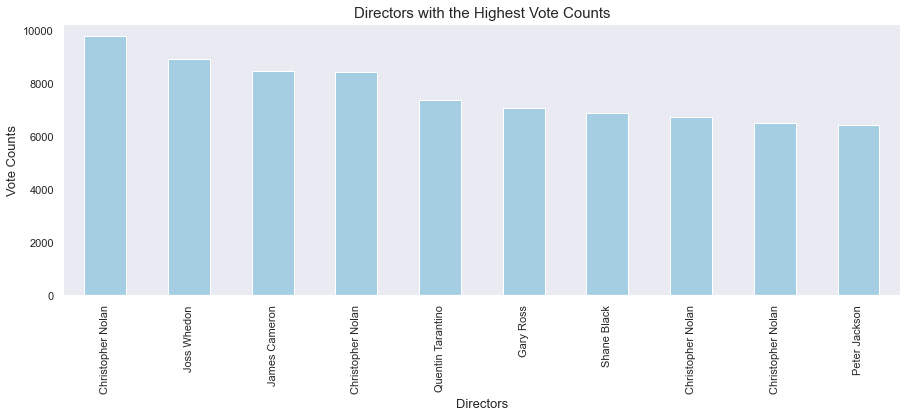

In [27]:
#plot a 'bar' plot using the plot funtion, colormap to change the color of the columns from default to preferred color.
plt.figure(figsize=(15,5))
Most_rated_director.vote_count.plot(kind='bar', colormap= 'Paired')


#specify the title and the labels of the plot, also adjusting the fontsize.
plt.title("Directors with the Highest Vote Counts", fontsize=15)
plt.xlabel('Directors',fontsize=13)
plt.ylabel("Vote Counts",fontsize= 13);

#### Key Findings:  Christopher Nolan, Joss Whedon and James Cameron are the top 3 highy rated directors.

### Research Question 7: What are the Most profitable Movies Produced?

In [28]:
# We do not have information as to profit in the dataset provided
# this can be deduced by building on the information about revenue and budget (i.e income less expenses)
# df[profit] was used to create a new column named profit and add to dataset
# create a function that now builds on the new column added, sort_values to sort dataset by profit, from highest to lowest

df["profit"] = df["revenue"]- df["budget"]
most_profitable = df.sort_values(by='profit',ascending=False)
most_profitable.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
1386,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09,2544505847
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225
5231,597,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,shipwreck|iceberg|ship|panic|titanic,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,4654,7.3,1997,2.716921e+08,2.506406e+09,1645034188
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360


In [29]:
# Who are the 15 most profitable movies released over the years?
# sort_values is used to sort Profit column
# ascending = False, to reverse the order of arrangement from default ordering
# .head to derive the first 15 on the list

Top_15_profitable = df.sort_values(by = ['profit'],ascending = False)[['original_title','profit']].head(15)

#change the index from default and replace it with Movie Titles
Top_15_profitable.reset_index(drop=True,inplace=True)
Top_15_profitable.set_index('original_title',inplace=True)
Top_15_profitable

,profit
original_title,
Avatar,2544505847
Star Wars: The Force Awakens,1868178225
Titanic,1645034188
Jurassic World,1363528810
Furious 7,1316249360
The Avengers,1299557910
Harry Potter and the Deathly Hallows: Part 2,1202817822
Avengers: Age of Ultron,1125035767
Frozen,1124219009


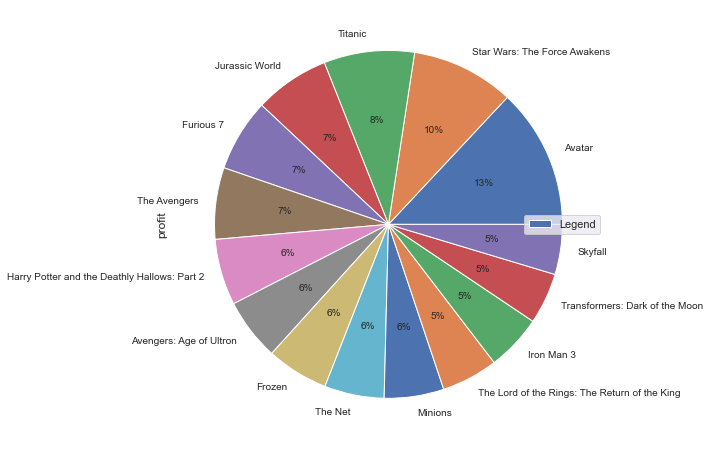

In [30]:
# plot a 'pie chart' using the plot funtion and specifying kind as pie.
#figsize to set the size of the pie chart as desired
#fontsize to set the size of each legend datalabel
#autopct to add the percentage of each genre as a percentage of total value


Top_15_profitable.plot(kind= 'pie',figsize = (13,8), subplots = True,fontsize=10, autopct='%1.0f%%')
plt.legend(['Legend'], loc='center right');

#### Key Findings: Avatar, Star Wars and Titanic still retained their positions as the most profitable movies produced over the years, (this means that there were the top 3 both in terms of revenue earned and profit realized).

### Research Question 8: What is the correlation between movie runtime and vote ratings?

Correlation Between Runtime And Vote ratings :  0.20344431905582355


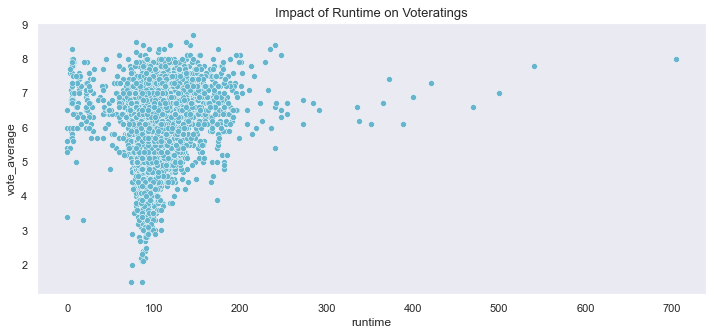

In [31]:
# plot a 'scatterplot' using the plot funtion by specifying preferred kind as scatterplot.
# specify the 2 independent vairables we are plotting against each other ; movie runtime and vote ratings
# set figure size by specifying the length and width

runtime_vs_voteratigs = sns.scatterplot(x=df['runtime'],y=df['vote_average'],color='c')
sns.set(rc={'figure.figsize':(17,7)})

#specify the title and the labels of the plot, also adjusting the fontsize.
plt.title("Impact of Runtime on Voteratings",fontsize=13)
plt.xlabel("runtime",fontsize=12)
plt.ylabel("vote_average",fontsize=12)
sns.set_style("darkgrid")

# apply the df.corr() to get the correlation between the 2 independent variables under study.
data_corr = df.corr()

print("Correlation Between Runtime And Vote ratings : ",data_corr.loc['runtime','vote_average']);

#### Key Findings: Impact of runtime on vote ratings shows that movies with runtime between 100 and 200 minutes had more votings than movies with longer runtime.

### Research Question 9:  What is the impact of popularity and revenue?

Correlation Between Popularity And Revenue :  0.6591530448561451


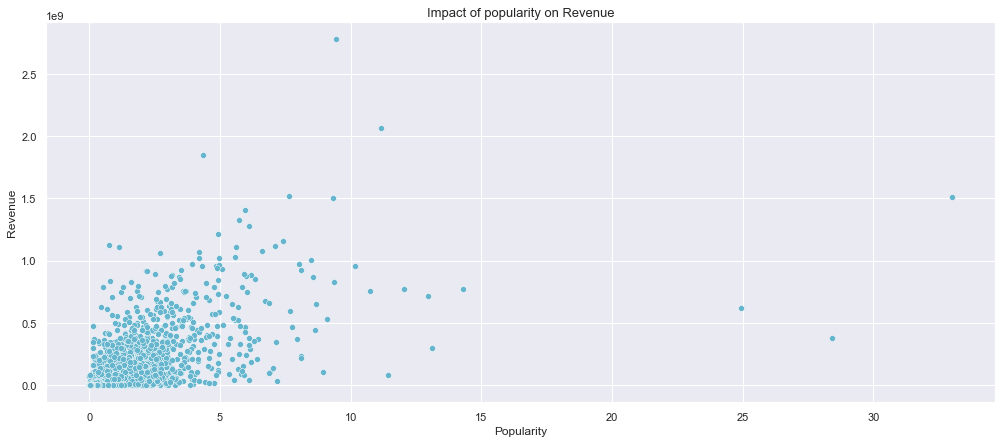

In [32]:
# plot a 'scatterplot' using the plot funtion by specifying preferred kind as scatterplot.
# specify the 2 independent vairables we are plotting against each other ; popularity and revenue
# set figure size by specifying the length and width
# sort_values is used to sort Profit column
# ascending = False, to reverse the order of arrangement from default ordering
# .head to derive the first 15 on the list

popularity_vs_revenue = sns.scatterplot(x=df['popularity'],y=df['revenue'],color='c')
sns.set(rc={'figure.figsize':(12,5)})

#specify the title and the labels of the plot, also adjusting the fontsize.
plt.title("Impact of popularity on Revenue",fontsize=13)
plt.xlabel("Popularity",fontsize=12)
plt.ylabel("Revenue",fontsize=12)
sns.set_style("darkgrid")

#find the correlation between them.
data_corr = df.corr()

print("Correlation Between Popularity And Revenue : ",data_corr.loc['popularity','revenue']);

#### Key Findings: Impact of popularity on revenue shows that the lower the popularity of movies, the likely of lower revenue earned.

### Research Question 10: Impact of inflation on revenue over the years

In [33]:
# what is the impact of inflation on revenue over the years
# this can be deduced by finding the difference between revenue_adj(revenue adjusted for inflation) and revenue
# created a new colum called inflation effect and assign the above calculations to the new column
# sort_values is used to sort by release year column
# ascending = True, to maintain the order of arrangement default ordering
# .head to derive the first 20 on the list

df["inflation_effect"] = df["revenue_adj"]- df["revenue"]
 
inf_on_revenue = df.sort_values(by='release_year',ascending=True)
inf_on_revenue.head(20)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,inflation_effect
10159,12617,0.232574,0,0,Midnight Lace,Doris Day|Rex Harrison|John Gavin|Myrna Loy|Ro...,David Miller,london|suspicion|threat to death|cowardliness,110,Thriller,Arwin Productions|Universal International Pict...,2060-10-13,10,5.7,1960,0.000000e+00,0.000000e+00,0,0.000000e+00
10171,39890,0.065808,0,0,The City of the Dead,Christopher Lee|Dennis Lotis|Patricia Jessel|T...,John Llewellyn Moxey,witch|burning of witches|witch burning|witchcraft,76,Horror,Vulcan Productions Inc.,2060-09-09,13,6.1,1960,0.000000e+00,0.000000e+00,0,0.000000e+00
10169,29756,0.110511,0,0,13 Ghosts,Charles Herbert|Jo Morrow|Martin Milner|Rosema...,William Castle,haunted house,85,Horror,Columbia Pictures|William Castle Productions,2060-08-05,12,5.5,1960,0.000000e+00,0.000000e+00,0,0.000000e+00
10168,15788,0.114188,0,10000000,The Bellboy,Jerry Lewis|Alex Gerry|Bob Clayton|Sonnie Sand...,Jerry Lewis,hotel|gag humor|madcap comedy|bellhop Â,72,Comedy|Family,Paramount Pictures|Jerry Lewis Productions,2060-07-20,12,7.0,1960,0.000000e+00,7.372967e+07,10000000,6.372967e+07
10167,11773,0.127219,200000,0,Village of the Damned,George Sanders|Barbara Shelley|Martin Stephens...,Wolf Rilla,suicide|england|based on novel|parents kids re...,77,Horror|Science Fiction,Metro-Goldwyn-Mayer (MGM),2060-07-01,28,7.0,1960,1.474593e+06,0.000000e+00,-200000,0.000000e+00
10166,21240,0.136525,0,0,Carry On Constable,Kenneth Connor|Charles Hawtrey|Sid James|Kenne...,Gerald Thomas,carry on|police station,86,Comedy,Peter Rogers Productions,2060-02-22,10,6.0,1960,0.000000e+00,0.000000e+00,0,0.000000e+00
10165,22013,0.138777,0,0,Elmer Gantry,Burt Lancaster|Jean Simmons|Arthur Kennedy|Dea...,Richard Brooks,evangelist|revivalism,146,Drama,United Artists,2060-06-19,11,6.3,1960,0.000000e+00,0.000000e+00,0,0.000000e+00
10164,2982,0.144106,0,0,The Lost World,Michael Rennie|Jill St. John|David Hedison|Cla...,Irwin Allen,central and south america|professor|dinosaur,97,Adventure|Fantasy|Science Fiction,Twentieth Century Fox Film Corporation,2060-07-13,11,6.0,1960,0.000000e+00,0.000000e+00,0,0.000000e+00
10163,1908,0.162753,0,0,Inherit the Wind,Spencer Tracy|Fredric March|Gene Kelly|Dick Yo...,Stanley Kramer,politician|teacher|lawyer|trial|courtroom,128,Drama|History,Stanley Kramer Productions,2060-06-24,30,6.8,1960,0.000000e+00,0.000000e+00,0,0.000000e+00
10161,11209,0.310398,0,0,The Alamo,John Wayne|Richard Widmark|Laurence Harvey|Fra...,John Wayne,texas|assault|alamo|mexican|mexican army,167,Action|Adventure|Drama|History|Western,United Artists|Batjac Productions|The Alamo Co...,2060-10-24,27,6.2,1960,0.000000e+00,0.000000e+00,0,0.000000e+00


In [34]:
# use the groupby funtion to group the data by release year
# .sum to get the sum of inflation effects for all rows per year
# .tail to get the last 20 years we want to review

inflation = inf_on_revenue.groupby(['release_year'])['inflation_effect'].sum().tail(20)
print(inflation)

release_year
1996    3.227354e+09
1997    3.802003e+09
1998    3.202446e+09
1999    3.477546e+09
2000    2.840063e+09
2001    3.080857e+09
2002    2.993476e+09
2003    2.790242e+09
2004    2.575701e+09
2005    1.915870e+09
2006    1.317507e+09
2007    9.844288e+08
2008    2.367569e+08
2009    3.611898e+08
2010    0.000000e+00
2011   -7.138739e+08
2012   -1.225399e+09
2013   -1.537235e+09
2014   -1.895785e+09
2015   -2.130662e+09
Name: inflation_effect, dtype: float64


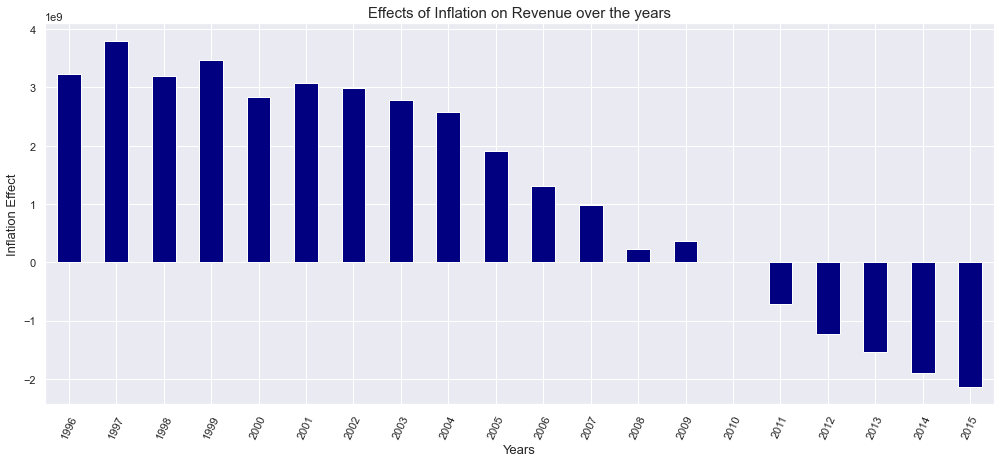

In [35]:
#plot a 'bar' plot using the plot funtion, colormap to change the color of the columns from default to preferred color.

plt.figure(figsize=(17,7))
inflation.plot(kind='bar', colormap= 'jet')

#setup the title and the labels of the plot.
plt.title("Effects of Inflation on Revenue over the years",fontsize=15)
plt.xticks(rotation = 65)
plt.xlabel('Years',fontsize=13)
plt.ylabel("Inflation Effect",fontsize= 13)
plt.show();

#### Key Findings: Impact of inflation of revenue over the last 20 years shows that inflation took a negative toll on revenue between 1996 and 2010, however the situation faired better between 2011 and 2015

<a id='conclusions'></a>

## Conclusions

####  1. Over the years, the top 3 movies in terms of revenue earned are Avatar, Star wars and Titanic
####  2. Trend of movies over the years shows that there has been an upward trend in movies released between 1960 and 2015, 2014    being the year with the highest record of movies so far.
####  3. Revene trend between 1960 and 2015 also shows an upward movement with a  positive steep increased witnessed in 1990
####  4. Robert De Niro, Samuel L. Jackson and Bruce Willis have been the cast with most appearances in movies.
####  5. Drama, Comedy and Thriller over the years are genres with highesr record of movies released.
####  6. Christopher Nolan, Joss Whedon and James Cameron are the top 3 highy rated directors.
####  7. Avatar, Star Wars and Titanic still retained their positions as the most profitable movies produced over the years, (this means that there were the top 3 both in terms of revenue earned and profit realized).
####  8. Impact of runtime on vote ratings shows that movies with runtime between 100 and 200 minutes had more votings than movies with longer runtime.
####  9. Impact of popularity on revennue shows that the extent of revenue earned is correlated with how popular a movie is, i.e lower the popularity of movies, the likely of a negative decline in revenue to be earned.
####  10. Impact of inflation of revenue over the last 20 years shows that inflation took a negative toll on revenue between 1996 and 2010, however the situation faired better between 2011 and 2015



## Limitations of the analysis
>Some of the limitations of this analysis are fundamentally as a result of the lapses and irregularity identified in the dataset provided. 

> One of the core limitations is the fact that the dataset contains are null and zero values in some columns, i.e directors, revenue and budget.

> Dropping rows with missing value could also negatively effect the quality of our analysis,as this would mean dropping a good chunck of our data inputs. 

> Also, almosts all the movies have more than one genres and directors attrubuted to it, this sometimes could cause a flaw in the analysis result when we are considering ratings, counts and other statistical analysis. This might also lead to multiplicity of data inputs. This also meant that for analysis per item, there was a need to use the solit function which took extra time to research on and work with successfully.
